In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import patsy

In [2]:
# Loading data from datasets
df_capes = pd.read_csv("CapesCleanedEnrolled.csv")
df_income = pd.read_csv("income_dataset.csv")
df_income

,Unnamed: 0,Last Name,First Name,Title,Regular Pay
0,0,ABI SAMRA,NICHOLAS CAMILL,LECTURER - ACADEMIC YEAR,40050.0
1,1,ACCOMANDO,ALYSSA WHEELER,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,8900.0
2,3,AGUILA,CHRISTINA O,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,5874.0
3,4,AJO,FRANCES BERGEN,LECTURER - ACADEMIC YEAR,53959.0
4,5,AKJEJE,ABDELHAK,LECTURER - ACADEMIC YEAR - CONTINUING,68012.0
...,...,...,...,...,...
3311,3385,ZLATOS,ANDREJ,PROFESSOR - ACADEMIC YEAR,142833.0
3312,3386,ZLOMISLIC,VINKO,HEALTH SCIENCES ASSISTANT CLINICAL PROFESSOR -...,138950.0
3313,3387,ZOU,YIMIN,PROFESSOR - ACADEMIC YEAR,160025.0
3314,3388,ZUNIGA,ELINA I,PROFESSOR - ACADEMIC YEAR,125447.0


In [3]:
# Standardizing the strings in order to combine 
def last_name(string):
    end = string.find(',')
    return string[0:end].upper()

def first_name(string):
    start = string.find(',')
    name = string[start+2:].upper()
    space = name.find(' ')
    if (space != -1):
        return name[:space+2]
    return name

def uppercase(string):
    return string.upper()

def first_name_income(string):
    name = string.upper()
    space = name.find(' ')
    if (space != -1):
        return name[:space+2]
    return name

In [4]:
# Standardizing Capes Set
df_capes['Last Name'] = df_capes['Instructor'].apply(last_name)
df_capes['First Name'] = df_capes['Instructor'].apply(first_name)
df_capes['Instructor'] = df_capes['Last Name'] + ', ' + df_capes['First Name']

# Standardizing Income Set
df_income['First Name'] = df_income['First Name'].apply(first_name_income)
df_income['Instructor'] = df_income['Last Name'] + ', ' + df_income['First Name']

In [5]:
# Merge datasets and get rid of merge columns
df = df_income.merge(df_capes, on=['Instructor'])
df = df.drop(['Unnamed: 0_x', 'Last Name_x', 'First Name_x', 'Instructor', 'Unnamed: 0_y', 'Last Name_y', 'First Name_y'], axis=1)
df

,Title,Regular Pay,Department,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled
0,LECTURER - ACADEMIC YEAR,40050.0,Electrical & Computer Eng.,95.120000,3.802000,5.0,196.0
1,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,8900.0,Psychology,97.000000,3.250000,1.0,52.0
2,LECTURER - ACADEMIC YEAR - CONTINUING,52200.0,Chemistry,90.575000,3.115000,4.0,1356.0
3,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,20767.0,Mathematics,90.450000,3.350000,2.0,491.0
4,LECTURER - ACADEMIC YEAR - CONTINUING,133608.0,Education Studies,97.900000,3.980000,1.0,55.0
...,...,...,...,...,...,...,...
1039,PROFESSOR - ACADEMIC YEAR - BUSINESS/ECONOMICS...,202692.0,Rady School of Management,82.200000,3.810000,1.0,52.0
1040,ASSISTANT PROFESSOR - ACADEMIC YEAR,96583.0,Chemistry,92.300000,3.125000,2.0,513.0
1041,VISITING ASSOCIATE PROFESSOR,142222.0,Rady School of Management,91.216667,3.546667,6.0,401.0
1042,PROFESSOR - ACADEMIC YEAR,142833.0,Mathematics,96.150000,3.210000,2.0,43.0


In [6]:
df.columns = ['Title', 'Regular_Pay', 'Department', 'Recommend_Instr', 'Avg_Grade', 'Num_Classes', 'Num_Students']


# Data Analysis

## Exploratory Data Analysis

In order to analyze our data and answer our research question, we begin by taking a closer look at the variables we plan to work with. From our dataset Capes.csv, we decided to investigate the following variables for each instructor: the department he/she is in, the recommendation percentage by students, the average grade expected by students, the number of classes taught, and the total number of students enrolled across all courses. From our dataset Incomes.csv, we look at the regular pay for each instructor and merge this data with the data from Capes.csv in order to find a relationship.

## Distributions and Removing Outliers

### 1) Regular Pay

First we will plot the distribution of the data we scraped for the regular pays of instructors. 

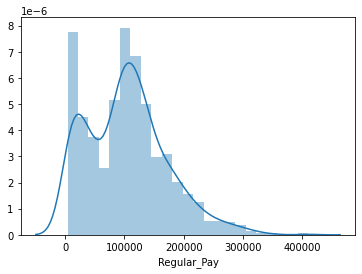

In [7]:
# Distribution for Regular Pay
# plt.hist(df['Regular_Pay'])
sns.distplot(df['Regular_Pay'])

We can see from the figure above that the data is bimodal and right skewed. As a result, we will look for and remove outliers in an attempt to normalize the data.

In [8]:
# Determine Outliers for Pay per Student
lower, upper = np.percentile(df['Regular_Pay'], [25, 75])
iqr = upper - lower
lower_cutoff = lower - 1.5 * iqr
upper_cutoff = upper + 1.5 * iqr
# print("Lower 25: ", lower_cutoff, "\nUpper 25: ", upper_cutoff)

df = (df[(df['Regular_Pay'] >= lower_cutoff) & (df['Regular_Pay'] <= upper_cutoff)])


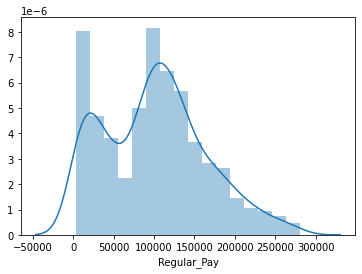

In [9]:
sns.distplot(df['Regular_Pay'])

After removing the outliers, we can see that the skewness was a result of outlying values.

### 2) Recommend Instructor

From this point forward, we will refer to the recommendation percentage by students for each instructor as the Recommend Instructor variable. Here we want to see if the Recommend Instructor variable is normal as well.

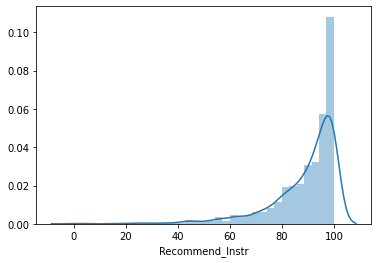

In [10]:
# Distribution for Regular Pay
# plt.hist(df['Regular_Pay'])
sns.distplot(df['Recommend_Instr'])

As we can see from the figure above that the data is strongly left skewed. As a result, we will look for and remove outliers in an attempt to normalize the data.

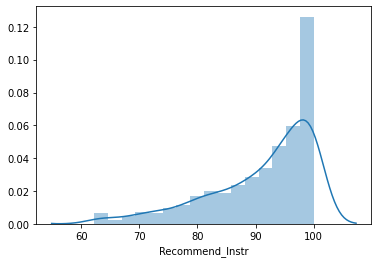

In [11]:
# Determine Outliers for Pay per Student
lower, upper = np.percentile(df['Recommend_Instr'], [25, 75])
iqr = upper - lower
lower_cutoff = lower - 1.5 * iqr
upper_cutoff = upper + 1.5 * iqr
# print("Lower 25: ", lower_cutoff, "\nUpper 25: ", upper_cutoff)

df_Recommend = (df[(df['Recommend_Instr'] >= lower_cutoff) & (df['Recommend_Instr'] <= upper_cutoff)])
sns.distplot(df_Recommend['Recommend_Instr'])

After removing the outliers, we can see that we have removed some of the skewness of the data.

### 3) Average Grade

From this point forward, we will refer to average grade expected by students for each instructor as the Average Grade variable. Here we want to see if the Average Grade variable is normal as well.

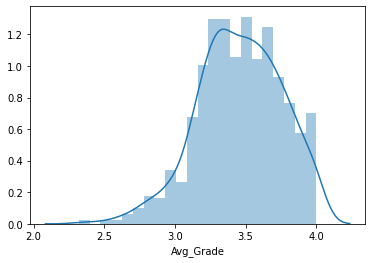

In [12]:
sns.distplot(df['Avg_Grade'])

As we can see from the figure above, the data is slightly skewed left. As a result, we will look for and remove outliers in an attempt to normalize the data.

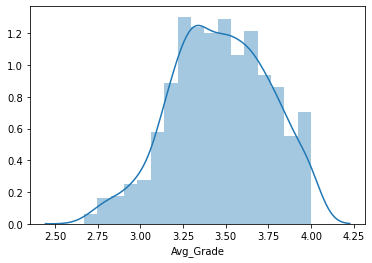

In [13]:
# Determine Outliers for Pay per Student
lower, upper = np.percentile(df['Avg_Grade'], [25, 75])
iqr = upper - lower
lower_cutoff = lower - 1.5 * iqr
upper_cutoff = upper + 1.5 * iqr
# print("Lower 25: ", lower_cutoff, "\nUpper 25: ", upper_cutoff)

df_Grade = (df[(df['Avg_Grade'] >= lower_cutoff) & (df['Avg_Grade'] <= upper_cutoff)])
sns.distplot(df_Grade['Avg_Grade'])

After removing the outliers, we can see that we have removed some of the skewness of the data.

### 4) Classes Taught

From this point forward, we will refer to the total number of classes taught by each instructor as the Classes Taught variable. Here we want to see if the Classes Taught variable is normal as well.

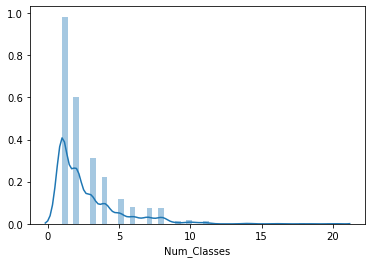

In [14]:
sns.distplot(df['Num_Classes'])

In [15]:
# Determine Outliers for Pay per Student
lower, upper = np.percentile(df['Num_Classes'], [25, 75])
iqr = upper - lower
lower_cutoff = lower - 1.5 * iqr
upper_cutoff = upper + 1.5 * iqr
# print("Lower 25: ", lower_cutoff, "\nUpper 25: ", upper_cutoff)

df_Classes = (df[(df['Num_Classes'] >= lower_cutoff) & (df['Num_Classes'] <= upper_cutoff)])

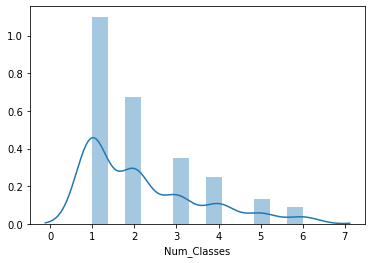

In [16]:
sns.distplot(df_Classes['Num_Classes'])

As we can see in the figure above, by removing the outliers we have removed some of the skewness of the distribution.

### 5) Number of Students Enrolled

From this point forward, we will refer to the total number of students taught by each instructor as the Enrolled Students variable. Here we want to see if the Enrolled Students variable is normal as well.

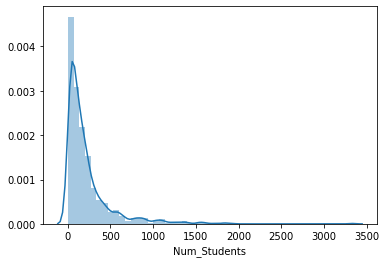

In [17]:
sns.distplot(df['Num_Students'])

In [18]:
# Determine Outliers for Pay per Student
lower, upper = np.percentile(df['Num_Students'], [25, 75])
iqr = upper - lower
lower_cutoff = lower - 1.5 * iqr
upper_cutoff = upper + 1.5 * iqr
# print("Lower 25: ", lower_cutoff, "\nUpper 25: ", upper_cutoff)

df_Students = (df[(df['Num_Students'] >= lower_cutoff) & (df['Num_Students'] <= upper_cutoff)])

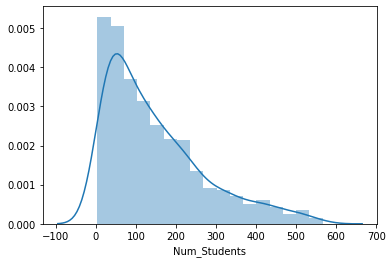

In [20]:
sns.distplot(df_Students['Num_Students'])

### 6) Department

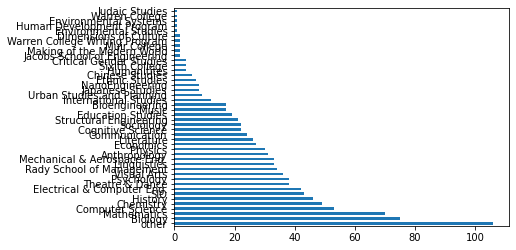

In [29]:
df['Department'].value_counts().plot(kind='barh')

## Relationship between Variables

In [30]:
df_Classes.corr()

,Regular_Pay,Recommend_Instr,Avg_Grade,Num_Classes,Num_Students
Regular_Pay,1.000000,-0.039382,-0.190752,-0.082180,-0.044616
Recommend_Instr,-0.039382,1.000000,0.400151,0.113570,-0.003649
Avg_Grade,-0.190752,0.400151,1.000000,0.112134,-0.131537
Num_Classes,-0.082180,0.113570,0.112134,1.000000,0.535327
Num_Students,-0.044616,-0.003649,-0.131537,0.535327,1.000000


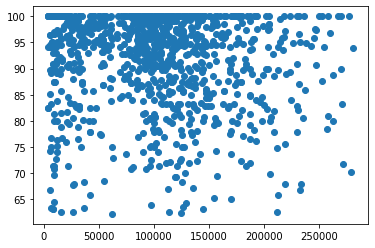

In [24]:
plt.scatter(df_Recommend['Regular_Pay'],df_Recommend['Recommend_Instr'])

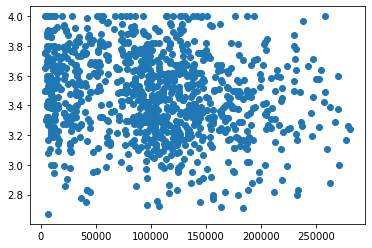

In [25]:
plt.scatter(df_Grade['Regular_Pay'],df_Grade['Avg_Grade'])